# Nyquist Sampling and Aliasing

This interactive simulation shows how our choice of sampling frequency affects our ability to faithfully represent and reconstruct oscillating signals. Using appropriate settings for the sample period---the $\Delta t$ between samples---we can demonstrate aliasing. __Aliasing__ is an effect whereby a signal at one frequency (set by FREQ, below) can appear at a different frequency if the sample period exceeds half of the signal period. This critical threshold is known as the __Nyquist Criterion__.

## Simulation 1: Fixed Time

In the first simulation below, we create an interactive plot where a signal of a fixed frequency is sampled at a selectable $\Delta t$ interval. We place samples at the times they were acquired to show how they line up with  the signal value at that moment, even though the line that connects samples may not follow the actual signal curve.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

<IPython.core.display.Javascript object>


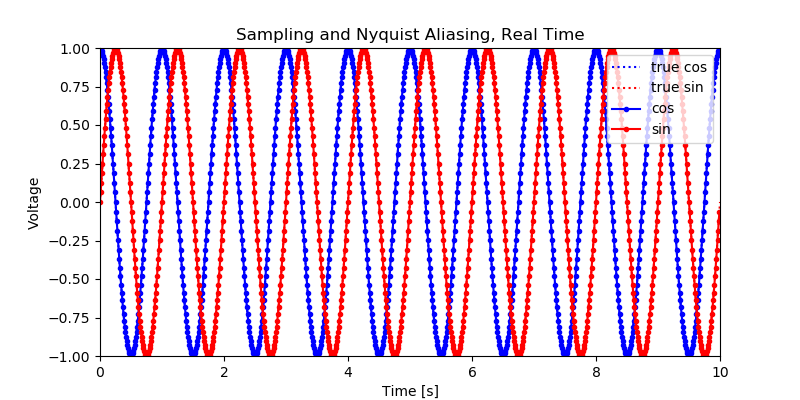

interactive(children=(FloatSlider(value=0.01, description='Sample Period [s]', layout=Layout(grid_area='footer…

In [2]:
# SIMULATION PARAMETERS
FREQ = 1. # Hz, frequency of signal to be sampled
AMPLITUDE = 1. # V, amplitude of signal to be sampled
TIME_INTERVAL = 10. # s, length of sample

dt_initial = 0.01
TIMES = np.arange(0., TIME_INTERVAL, dt_initial)
true_times = np.linspace(0, TIME_INTERVAL, 1024)

fig, ax = plt.subplots(1, figsize=(8,4))
true_cos, = ax.plot(true_times, AMPLITUDE * np.cos(2*np.pi * FREQ * true_times), 'b:', label='true cos')
true_sin, = ax.plot(true_times, AMPLITUDE * np.sin(2*np.pi * FREQ * true_times), 'r:', label='true sin')
cos_line, = ax.plot(TIMES, np.zeros_like(TIMES), 'b.-', label='cos') # handle for plotting cos
sin_line, = ax.plot(TIMES, np.zeros_like(TIMES), 'r.-', label='sin') # handle for plotting sin

# Slider controlling sample frequency
dt_widget = FloatSlider(dt_initial, min=0.005, max=3, step=0.01, 
                        description='Sample Period [s]',
                        style={'description_width':'initial'},
                        layout=Layout(width='auto', grid_area='footer'))

def update(dt):
    '''Update plots for each line according to the time step. Reads dt 
    from dt_widget.'''
    t = np.arange(0., TIME_INTERVAL, dt)
    cos_line.set_xdata(t)
    cos_line.set_ydata(AMPLITUDE * np.cos(2*np.pi * FREQ * t))
    sin_line.set_xdata(t)
    sin_line.set_ydata(AMPLITUDE * np.sin(2*np.pi * FREQ * t))
    
def init(ax):
    '''Set initial plot parameters.'''
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Voltage')
    ax.set_xlim(0, TIME_INTERVAL)
    ax.set_ylim(-AMPLITUDE,AMPLITUDE)
    ax.set_title('Sampling and Nyquist Aliasing, Real Time')
    ax.legend(loc='upper right')
    
init(ax)
interact(update, dt=dt_widget)
plt.show()

# Simulation 2: Fixed Samples

The simulation above demonstrated in physical time how our signal is represented by the samples that we acquire. In reality, however, when we acquire samples, they exist on a computer as numbers---one following another. The physical $\Delta t$ between samples is something we have to infer from how we configured our electronics. 

The simulation below now plots the same signal as above, but now fixing the number of samples plotted with no attempt to align them to physical time. This case most closely aligns with what you will see if you just plot the data you acquire and will help you build your intuition for what you are seeing. However, this is not a good example for how to present data in a report: there, the physical axis is the most meaningful.

<IPython.core.display.Javascript object>


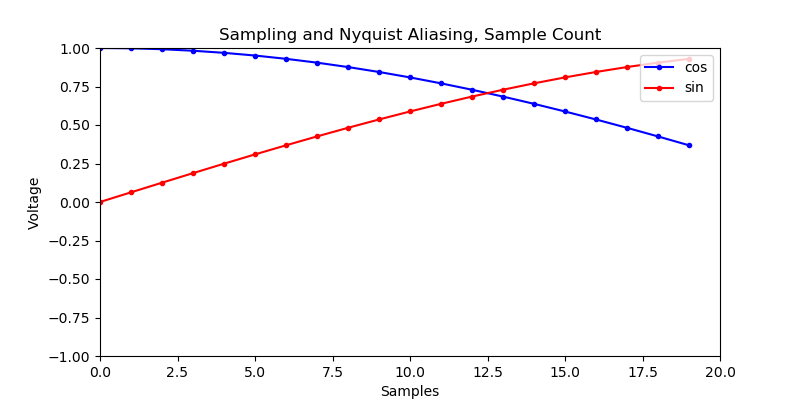

interactive(children=(FloatSlider(value=0.01, description='Sample Period [s]', layout=Layout(grid_area='footer…

In [3]:
# SIMULATION PARAMETERS
NSAMPLES = 20. # number of samples to plt

SAMPLES = np.arange(0., NSAMPLES)

fig, ax = plt.subplots(1, figsize=(8,4))
cos_line, = ax.plot(SAMPLES, np.zeros_like(SAMPLES), 'b.-', label='cos') # handle for plotting cos
sin_line, = ax.plot(SAMPLES, np.zeros_like(SAMPLES), 'r.-', label='sin') # handle for plotting sin

# Slider controlling sample frequency
dt_widget = FloatSlider(dt_initial, min=0.005, max=3, step=0.01, 
                        description='Sample Period [s]',
                        style={'description_width':'initial'},
                        layout=Layout(width='auto', grid_area='footer'))

def update(dt):
    '''Update plots for each line according to the time step. Reads frequency
    from freq_widget. Called repeatedly by FuncAnimation.'''
    cos_line.set_ydata(AMPLITUDE * np.cos(2*np.pi * FREQ * SAMPLES * dt))
    sin_line.set_ydata(AMPLITUDE * np.sin(2*np.pi * FREQ * SAMPLES * dt))
    
def init(ax):
    '''Set initial plot parameters. Called once by FuncAnimation at beginning.'''
    ax.set_xlabel('Samples')
    ax.set_ylabel('Voltage')
    ax.set_xlim(0, NSAMPLES)
    ax.set_ylim(-AMPLITUDE,AMPLITUDE)
    ax.set_title('Sampling and Nyquist Aliasing, Sample Count')
    ax.legend(loc='upper right')
    
init(ax)
interact(update, dt=dt_widget)
plt.show()

# Simulation 3: Fixed Sample Rate

Now suppose that we have an analog-to-digital converter (ADC) sampling at a fixed rate of 1 Hz (the units
are arbitrary). This time, you can control the input (radio frequency; RF) signal and watch how the sampled
waveform and the spectrum alias through the shaded __Nyquist zones__.

<IPython.core.display.Javascript object>


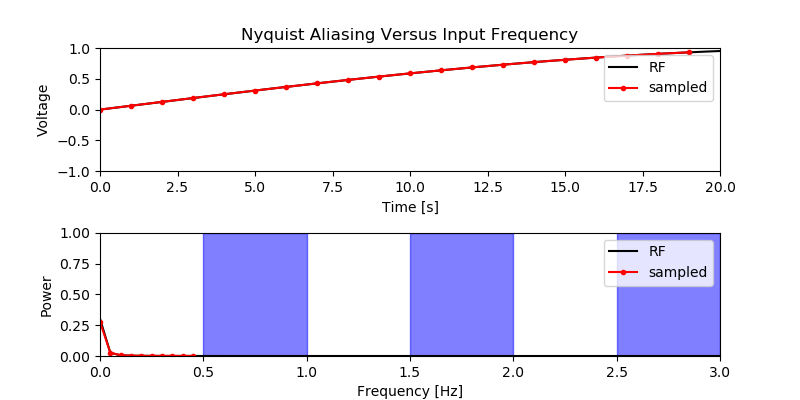

interactive(children=(FloatSlider(value=0.01, description='Input Frequency [Hz]', layout=Layout(grid_area='foo…

In [4]:
# SIMULATION PARAMETERS
NSAMPLES = 20 # number of samples to plt

AMPLITUDE = 1.
TIMES = np.arange(0., NSAMPLES)
FREQS = np.fft.fftshift(np.fft.fftfreq(TIMES.size, np.median(np.diff(TIMES))))
true_times = np.linspace(0, NSAMPLES, 4096)
true_freqs = np.fft.fftshift(np.fft.fftfreq(true_times.size, np.median(np.diff(true_times))))
fq_initial = 0.01

fig, (ax1,ax2) = plt.subplots(2, figsize=(8,4))
fig.subplots_adjust(hspace=0.5)
true_sin, = ax1.plot(true_times, np.zeros_like(true_times), 'k', label='RF')
sin_line, = ax1.plot(TIMES, np.zeros_like(TIMES), 'r.-', label='sampled')
true_spec, = ax2.plot(true_freqs, np.zeros_like(true_freqs), 'k', label='RF')
spec_line, = ax2.plot(FREQS, np.zeros_like(FREQS), 'r.-', label='sampled')

# Slider controlling input frequency
fq_widget = FloatSlider(fq_initial, min=0., max=3, step=0.01, 
                        description='Input Frequency [Hz]',
                        style={'description_width':'initial'},
                        layout=Layout(width='auto', grid_area='footer'))

def update(fq):
    '''Update plots for each line according to the time step. Reads frequency
    from freq_widget. Called repeatedly by FuncAnimation.'''
    d_true = AMPLITUDE * np.sin(2 * np.pi * fq * true_times)
    d_samp = AMPLITUDE * np.sin(2 * np.pi * fq * TIMES)
    true_sin.set_ydata(d_true)
    sin_line.set_ydata(d_samp)
    true_spec.set_ydata(np.fft.fftshift(np.abs(np.fft.fft(d_true)/d_true.size))**2)
    spec_line.set_ydata(np.fft.fftshift(np.abs(np.fft.fft(d_samp)/d_samp.size))**2)
    
    
def init(ax):
    '''Set initial plot parameters. Called once by FuncAnimation at beginning.'''
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Voltage')
    ax1.set_xlim(0, NSAMPLES)
    ax1.set_ylim(-AMPLITUDE,AMPLITUDE)
    ax1.set_title('Nyquist Aliasing Versus Input Frequency')
    ax1.legend(loc='upper right')
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Power')
    ax2.set_xlim(0, 3)
    ax2.set_ylim(0,AMPLITUDE**2)
    ax2.axvspan(0.5, 1, alpha=0.5, color='blue')
    ax2.axvspan(1.5, 2, alpha=0.5, color='blue')
    ax2.axvspan(2.5, 3, alpha=0.5, color='blue')
    ax2.legend(loc='upper right')
    
init(ax1)
interact(update, fq=fq_widget)
plt.show()

## Simulation 4: Positive and Negative Frequencies

In the simulations above, we showed signals with both sine and cosine components. For real-valued signals, the shape of the sampled waveform depend strongly on the phase relative to the cadence of your sampling, especially as you approach the __Nyquist Criterion__ of 2 samples per period. For example, you could measure the positive and negative peaks of the cosine, but hit the zero-point of the sine every time; if you only had the zero samples of the sine wave, you could not distinguish it from a constant (direct-current or DC) signal.

In general, we need samples that are $90^\circ$ out of phase to fully characterize a signal of arbitrary phase, getting both its frequency and its full amplitude. We call this I/Q (corresponding to sin/cos) sampling. The funny thing is, once you measure both the sine and cosine components of a signal, you realize that there is a such thing as __negative frequency__. Negative frequencies put a negative value inside the argument of the sin/cos. For a sine wave, this inverts the value; for cosine it has no effect. Thus, a __negative frequency corresponds to a phase relationship between the sine and cosine__.

You can see this relationship by treating the cosine as the x coordinate of a voltage and the sine as the y coordinate. Plotted this way versus time, you will see the signal wind in the counter-clockwise direction for a positive frequency and clockwise for a negative frequency. (If only the ancient Babylonians had known about the right-hand rule.)

Moreover, you will see that __aliased__ signals can switch from positive to negative frequencies. This is particularly easy to see when your sample period is just *slightly* less than your signal period; each sample, you step through almost the entire period, but fall just a little short, making it look like you have actually stepped backward relative to the signal oscillation. This is precisely the same effect that makes car tires appear to spin backward in videos.

<IPython.core.display.Javascript object>


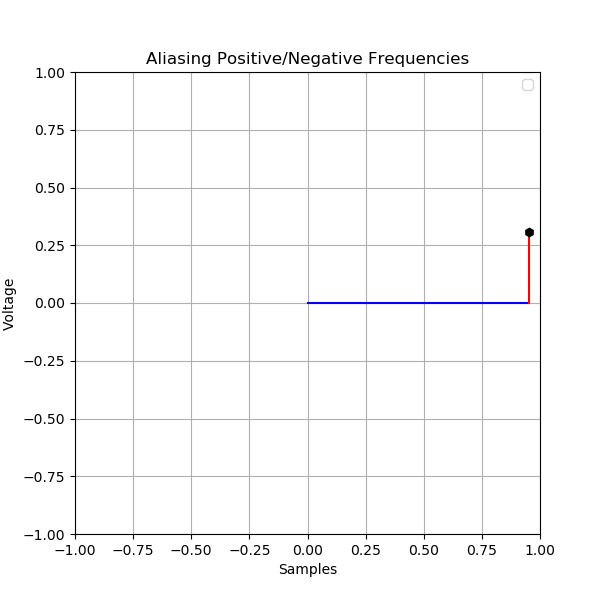

interactive(children=(FloatSlider(value=0.01, description='Sample Period [s]', layout=Layout(grid_area='footer…

In [5]:
fig, ax = plt.subplots(1, figsize=(6,6))

FREQ = 1. # Hz, frequency of signal to be sampled
AMPLITUDE = 1. # V, amplitude of signal to be sampled
NSAMPLES = 100 # number of samples to plt
dt_initial = 0.01
SAMPLES = np.arange(0., NSAMPLES)
cos_line, = ax.plot([0, AMPLITUDE], [0, 0], 'b') # handle for plotting cos
sin_line, = ax.plot([0, 0], [0, 0], 'r') # handle for plotting sin
sample, = ax.plot([1], [0], 'kh') # handle for plotting sample

# Slider controlling sample frequency
dt_widget = FloatSlider(dt_initial, min=0.005, max=3, step=0.01, 
                        description='Sample Period [s]',
                        style={'description_width':'initial'},
                        layout=Layout(width='auto', grid_area='footer'))

def animate(t):
    '''Update plots for each line according to the time step. Reads frequency
    from freq_widget. Called repeatedly by FuncAnimation.'''
    dt = dt_widget.value
    x = AMPLITUDE * np.cos(2*np.pi * FREQ * t * dt)
    y = AMPLITUDE * np.sin(2*np.pi * FREQ * t * dt)
    sample.set_xdata([x])
    sample.set_ydata([y])
    cos_line.set_xdata([0,x])
    sin_line.set_xdata([x,x])
    sin_line.set_ydata([0,y])
    
def init():
    '''Set initial plot parameters. Called once by FuncAnimation at beginning.'''
    plt.xlabel('Samples')
    plt.ylabel('Voltage')
    ax.set_xlim(-AMPLITUDE, AMPLITUDE)
    ax.set_ylim(-AMPLITUDE, AMPLITUDE)
    ax.grid(True)
    ax.set_title('Aliasing Positive/Negative Frequencies')
    ax.legend(loc='upper right')
    
ani = FuncAnimation(fig, animate, SAMPLES, init_func=init, interval=50, blit=True)

def build_animation(dt):
    '''Function which causes FuncAnimation to redraw itself, when freq_widget changes.
    Does not actually hand off the value, but needs to accept an argument tied to
    freq_widget in order to be triggered by updating the slider.'''
    ani.new_frame_seq()

# force animation to redraw when freq_widget changes, even though
# the parameter is not actually passed through (used as global, instead)
interact(build_animation, dt=dt_widget)
plt.show()